### usrcrd!

In [1]:
import numpy as np
import math

def euler2mtx(data):
    # input ... radian
    posX = data[0]
    posY = data[1]
    posZ = data[2]
    pitch = data[3]
    roll = data[4]
    yaw = data[5]
    
    Rx = np.array([[1, 0, 0, 0],
                   [0, math.cos(pitch), -1 * math.sin(pitch), 0],
                   [0, math.sin(pitch), math.cos(pitch), 0],
                   [0, 0, 0, 1]])
    
    Ry = np.array([[math.cos(roll), 0, math.sin(roll), 0],
                   [0, 1, 0, 0],
                   [-1 * math.sin(roll), 0, math.cos(roll), 0],
                   [0, 0, 0, 1]])
    
    Rz = np.array([[math.cos(yaw), -1 * math.sin(yaw), 0, 0],
                   [math.sin(yaw), math.cos(yaw), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])
    
    mtxR = np.dot(Rz, np.dot(Ry, Rx))
    
    mtxR[0][3] = posX
    mtxR[1][3] = posY
    mtxR[2][3] = posZ
    
    return mtxR

# ref : https://www.learnopencv.com/rotation-matrix-to-euler-angles/
# Calculates rotation matrix to euler angles
# The result is the same as MATLAB except the order
# of the euler angles ( x and z are swapped ).
def mtx2euler(mtx) :
    dLocSqrt = (mtx[0][0] * mtx[0][0] +  mtx[1][0] * mtx[1][0])
    
    if(dLocSqrt<0.0):
        dLocSqrt = 0.0
    else:
        dLocSqrt= math.sqrt(dLocSqrt)
    
    dLocRy = math.atan2(-mtx[2][0], dLocSqrt)
    dLocCy = math.cos(dLocRy)
 
    if (dLocCy < 0.001745328365898):
        Rx = 0.0
        Ry = dLocRy
        Rz = math.atan2(-mtx[0][1], mtx[1][1])
    else:
        Rx = math.atan2(mtx[2][1]/dLocCy, mtx[2][2]/dLocCy)
        Ry = dLocRy
        Rz = math.atan2(mtx[1][0]/dLocCy, mtx[0][0]/dLocCy)
        
    X = mtx[0][3]
    Y = mtx[1][3]
    Z = mtx[2][3]
    # output ... radian
    Rx = Rx
    Ry = Ry
    Rz = Rz
 
    return np.array([X, Y, Z, Rx, Ry, Rz])

In [14]:
def quat2euler(quat) :
    qW = quat[3]
    qX = quat[4]
    qY = quat[5]
    qZ = quat[6]
    Tx = quat[0]
    Ty = quat[1]
    Tz = quat[2]
    
    sqw = qW * qW
    sqx = qX * qX
    sqy = qY * qY
    sqz = qZ * qZ
    
    unit = sqx + sqy + sqz + sqw
    test = qX * qY + qZ * qW
    
    if (test > 0.4999 * unit):
        Ry = 2.0 * math.atan2(qX, qW)
        Rx = 3.141592654 * 0.5
        Rz = 0.0
        
        return np.array([Tx, Ty, Tz, Rz * 180 / 3.141592654, Ry * 180 / 3.141592654, Rx * 180 / 3.141592654])
    
    elif(test < -0.4999 * unit):
        Ry = -2.0 * math.atan2(qX, qW)
        Rx = -3.141592654 * 0.5
        Rz = 0.0
        
        return np.array([Tx, Ty, Tz, Rz * 180 / 3.141592654, Ry * 180 / 3.141592654, Rx * 180 / 3.141592654])
    
    else:
        Ry = math.atan2(2.0 * qY * qW - 2.0 * qX * qZ, sqx - sqy - sqz + sqw)
        Rx = math.asin(2.0 * test / unit)
        Rz = math.atan2(2.0 * qX * qW - 2.0 * qY * qZ, -sqx + sqy - sqz + sqw)
        
        #return np.array([Tx, Ty, Tz, Rz * 180 / 3.141592654, Ry * 180 / 3.141592654, Rx * 180 / 3.141592654])
        return np.array([Tx, Ty, Tz, Rz, Ry, Rx])

def quat2mtx(quat):
    qw = quat[0]
    qx = quat[1]
    qy = quat[2]
    qz = quat[3]
    Tx = quat[4]
    Ty = quat[5]
    Tz = quat[6]
    
    mtx = np.array([[(1 - 2 * qy * qy - 2 * qz * qz), (2 * qx * qy - 2 * qw * qz), (2 * qx * qz + 2 * qw * qy), Tx],
                    [(2 * qx * qy + 2 * qw * qz), (1 - 2 * qx * qx - 2 * qz * qz), (2 * qy * qz - 2 * qw * qx), Ty],
                    [(2 * qx * qz - 2 * qw * qy), (2 * qy * qz + 2 * qw * qx), (1 - 2 * qx * qx - 2 * qy * qy), Tz],
                    [0.0,0.0,0.0,1.0]])
    
    return mtx

In [15]:
def quat2mtx(quat):
    qw = quat[0]
    qx = quat[1]
    qy = quat[2]
    qz = quat[3]
    Tx = quat[4]
    Ty = quat[5]
    Tz = quat[6]
    
    mtx = np.array([[(1 - 2 * qy * qy - 2 * qz * qz), (2 * qx * qy - 2 * qw * qz), (2 * qx * qz + 2 * qw * qy), Tx],
                    [(2 * qx * qy + 2 * qw * qz), (1 - 2 * qx * qx - 2 * qz * qz), (2 * qy * qz - 2 * qw * qx), Ty],
                    [(2 * qx * qz - 2 * qw * qy), (2 * qy * qz + 2 * qw * qx), (1 - 2 * qx * qx - 2 * qy * qy), Tz],
                    [0.0,0.0,0.0,1.0]])
    
    return mtx

In [16]:
def mulmulmtx(robot2base, ots2base, ots2marker, marker2bone, bone2imp):
    temp0 = np.dot(robot2base, np.linalg.inv(ots2base))
    temp1 = np.dot(temp0, ots2marker)
    temp2 = np.dot(temp1, marker2bone)
    temp3 = np.dot(temp2, bone2imp)
    
    result = temp3
    
    return result

## test!!

In [17]:
q = [176.672668457031,507.314361572266,-2256.70629882813,0.994967699050903,0.0804495215415955,0.0122915301471949,-0.0584471710026264]
e = [176.672668457031,507.314361572266,-2256.70629882813,0.159417970756751,0.0338699201783227,-0.114644981277825]

In [18]:
q2e = quat2euler(q)

In [19]:
# print(q2e[0], q2e[1], q2e[2], q2e[3]* 180 / 3.141592654, q2e[4]* 180 / 3.141592654, q2e[5]* 180 / 3.141592654)
print(q2e[0], q2e[1], q2e[2], q2e[3], q2e[4], q2e[5])

176.672668457031 507.314361572266 -2256.70629882813 0.16331732373974756 0.034093557043693136 -0.11457893949347789


In [20]:
print(q2e[0]-e[0], q2e[1]-e[1], q2e[2]-e[2], q2e[3]-e[3], q2e[4]-e[4], q2e[5]-e[5])

0.0 0.0 0.0 0.003899352982996568 0.0002236368653704343 6.604178434711783e-05


In [28]:
import random
random.uniform(0, 0.05)

0.024091242823093356

In [127]:
import numpy as np

mu, sigma = 0, 0.3 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)

In [128]:
abs(mu - np.mean(s)) < 0.001

True

In [129]:
mu - np.mean(s)

0.0006705333216579012

In [130]:
abs(sigma - np.std(s, ddof=1)) < 0.01

True

In [131]:
sigma - np.std(s, ddof=1)

-0.0007100536962889592

In [7]:
%matplotlib notebook

import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


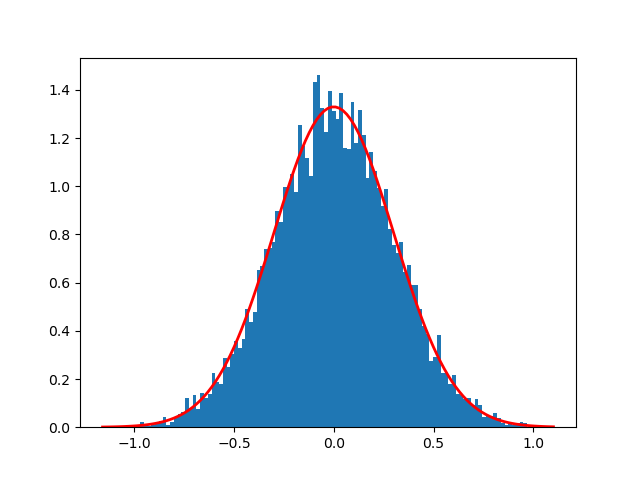

In [13]:
count, bins, ignored = plt.hist(s, 120, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [144]:
while(True):
    mu, sigma = 0, 0.3 # mean and standard deviation
    s = np.random.normal(mu, sigma, 10000)
    if(abs(mu - np.mean(s)) < 0.001):
        break
    else:
        print(mu - np.mean(s))

0.0011129391005004307
-0.0043190677207230535
-0.0017417993502441514
-0.0017328202462226865
-0.0037273029753966055
0.0022430924178392024
-0.0028231564598916437
0.0019444744543975808
-0.00497515366311975
-0.0018117227841922662
0.005882255742115466


In [163]:
import numpy as np

def random_vector(length):
    rand_i, rand_j = np.random.rand(2)            # Two independent random numbers from a uniform distribution in the range (0, 1)
    theta          = 2 * np.pi * rand_i           # Spherical coordinate theta
    phi            = np.arccos(2 * rand_j - 1)    # Spherical coordinate phi, corrected for distribution bias
    x              = np.cos(theta) * np.sin(phi)  # Cartesian coordinate x
    y              = np.sin(theta) * np.sin(phi)  # Cartesian coordinate y
    z              = np.cos(phi)                  # Cartesian coordinate z
    vector         = [x*length, y*length, z*length]
    return vector

In [179]:
data_list = []

for i in range((555)):
    data_list.append(random_vector(0.003))

In [180]:
xs = []
ys = []
zs = []

for i in range(len(data_list)):
    xs.append(data_list[i][0])
    ys.append(data_list[i][1])
    zs.append(data_list[i][2])

<IPython.core.display.Javascript object>


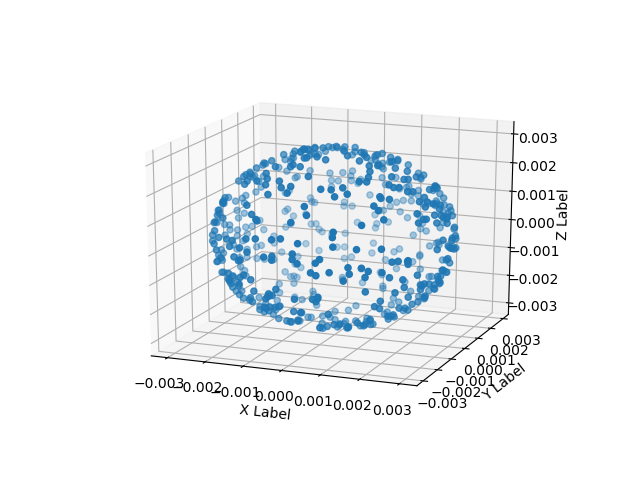

In [181]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', 0, 0)]:
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()